In [1]:
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def encontra_L(f, C):
    # Retorna L (mH)
    return (1/((2*pi*f)**2*C))*1000

C = 0.47e-6
f = 50000
L = encontra_L(f, C)
print(f'L escolhido {L}')

L escolhido 0.02155769864730591


In [3]:
#implemente seu código aqui
C1 = C2 = C
L1 = L2 = L
V = 9
R1 = R2 = 0.04
Rc = 10 #Sendo chutado
k = 1 #Sendo chutado
w = 2*pi*f
M = sqrt(L1*L2)
XL1 = L1*w*1j
XL2 = L2*w*1j
XM = M*w*1j

XC1 = 1/(C1*w*1j)
XC2 = 1/(C2*w*1j)

In [4]:
def CalcularTransformador(v1, Rc, XM) -> tuple[complex, complex]:
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+Rc/((Rc/XC2)+1)]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1]

i1, i2 = CalcularTransformador((2/pi)*V, 10, XM)
print(i1)
print(i2)

(0.13141193881293278+0.46467420416540184j)
(0.13128327133020412+0.4650547538168071j)


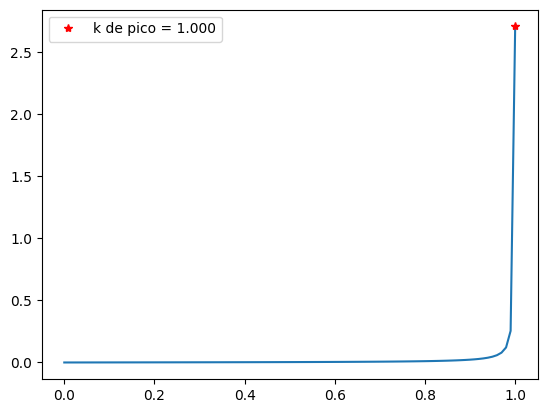

In [8]:
# Melhor K

lista_k = np.linspace(0,1,100)
lista_V2 = []

for k in lista_k:
    novo_XM = k*XM
    i1, i2 = CalcularTransformador((2/pi)*V, 10, novo_XM)
    i4 = i2/((Rc/XC2)+1)
    lista_V2.append(abs(Rc*i4))
pico_idx = lista_V2.index(max(lista_V2))
k_top = lista_k[pico_idx]
plt.plot(lista_k, lista_V2)
plt.plot(k_top, max(lista_V2), '*r',label=f'k de pico = {k_top:.3f}')
plt.legend()
plt.show()


